<a href="https://colab.research.google.com/github/Jvargas442/Ciencia-de-datos/blob/main/Taller_Informe_ejecutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumen Ejecutivo del Censo Socioeconómico de la Población de Los Santos, Santander
## Introducción:
El presente resumen ejecutivo ofrece una visión general de los resultados del censo socioeconómico realizado en el municipio de Los Santos, Santander, durante el año 2023. Este censo tuvo como objetivo caracterizar a la población, analizar las condiciones socioeconómicas de los hogares y evaluar aspectos clave relacionados con educación, empleo, vivienda y acceso a servicios básicos.

La información recopilada proporciona una base fundamental para el diseño y formulación de políticas públicas orientadas al mejoramiento de la calidad de vida de los habitantes del municipio. En las siguientes secciones se presentan los principales hallazgos, desglosados en aspectos demográficos, económicos, sociales y de infraestructura.

## Objetivos
### Objetivo General:
Caracterizar a la población del municipio de Los Santos, Santander, mediante el análisis de las condiciones socioeconómicas de los hogares, evaluando aspectos demográficos, educativos, laborales, de vivienda y acceso a servicios básicos.

### Objetivos Específicos:
Identificar las características demográficas de la población, como edad, género y composición familiar.

Evaluar las condiciones socioeconómicas de los hogares, incluyendo ingresos, ocupación y acceso a servicios básicos.

Analizar las características de la vivienda, como tipología, materiales de construcción y acceso a servicios públicos.

Identificar las necesidades y problemáticas socioeconómicas predominantes para orientar la formulación de políticas públicas.

Establecer una base de datos confiable y actualizada para futuras investigaciones y estudios de planeación territorial.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_excel("/content/CENSO POBLACIONAL AGOSTO.xlsx")

In [5]:
missing = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).reset_index()
missing.columns = ['Columna', '% Faltantes']
display(missing)
# 3. Limpieza de datos
# 3.1. Rellenar columnas numéricas con la media
num_cols = df.select_dtypes(include=['number']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# 3.2. Rellenar columnas categóricas con la moda o 'No aplica' si no existe moda
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    mode = df[col].mode()
    df[col].fillna(mode[0] if not mode.empty else 'No aplica', inplace=True)

# 3.3. Eliminar columnas con más del 50% de valores faltantes
to_drop = missing[missing['% Faltantes'] > 50]['Columna']
df.drop(columns=to_drop, inplace=True)

# 4. Verificación de limpieza
total_missing_after = df.isnull().sum().sum()
print(f"Total de valores faltantes después de limpieza: {total_missing_after}")


,Columna,% Faltantes
0,Cod_Chip,100.000000
1,Dir_Chip,100.000000
2,Email_contacto,98.344498
3,Jefe_UG,65.265265
4,fec_ini_visita2,48.594749
...,...,...
250,marca,0.000000
251,Linea_p,0.000000
252,replicacion,0.000000
253,C,0.000000


<ipython-input-5-231ae5ce039e>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Total de valores faltantes después de limpieza: 0


<ipython-input-5-231ae5ce039e>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode[0] if not mode.empty else 'No aplica', inplace=True)


In [7]:
print(df.columns)

Index(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'fec_paquete',
       'num_paquete', 'num_ficha', 'ide_ficha_origen', 'ide_edificacion',
       'ver_estructura',
       ...
       'ide_Ug', 'persug', 'Capital', 'marca', 'estado', 'Linea_p',
       'replicacion', 'fec_actualizacion_cns', 'C', 'Clasificacion'],
      dtype='object', length=251)


# Selección de variables clave
## Ubicación

cod_dpto, Departamento
cod_mpio, Municipio
ver_estructura (vereda / corregimiento)

## Dimensión demográfica

I2 (sexo)
I3 (edad)
I4 (nivel educativo)
I5 (alfabetismo / escolaridad)

## Dimensión socioeconómica

I8 (estado de actividad económica: ocupado/desocupado)
I10 (ingreso mensual)
I6 (estado civil)
I7 (discapacidad)

## Vivienda y servicios públicos

I11 (tipo de vivienda)
I12 (material de piso)
I13 (acceso a agua potable)
I14 (acceso a energía eléctrica)
I15 (acceso a saneamiento)

In [11]:
vars_clave = ['cod_dpto','Departamento','cod_mpio','Municipio','ver_estructura',
              'I2','I3','I4','I5',
              'I8','I10','I6','I7',
              'I11','I12','I13','I14','I15']
df_sub = df[vars_clave]

In [12]:
n = len(df_sub)
print(f"Número de encuestas válidas: {n}")

# Cobertura por vereda
print(df_sub['ver_estructura'].value_counts(normalize=True).mul(100).round(1))

Número de encuestas válidas: 12987
ver_estructura
50118082017         41.7
40018082017         34.5
40118082017         14.8
30118082017          8.1
18082017             0.4
30018082017          0.4
401L18082017         0.1
5.0.0 - 18082017     0.0
Name: proportion, dtype: float64


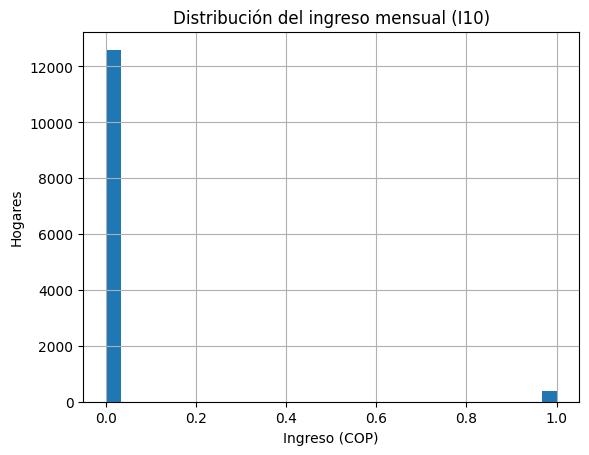

In [13]:
df['I10'].hist(bins=30)
plt.title('Distribución del ingreso mensual (I10)')
plt.xlabel('Ingreso (COP)')
plt.ylabel('Hogares')
plt.show()

In [14]:
for col in ['I2','I4','I8','I11']:
    freq = df[col].value_counts(normalize=True).mul(100).round(1)
    print(f"\n{col}:\n", freq)


I2:
 I2
0    85.1
1    14.9
Name: proportion, dtype: float64

I4:
 I4
0    76.5
1    23.5
Name: proportion, dtype: float64

I8:
 I8
0    50.6
1    49.4
Name: proportion, dtype: float64

I11:
 I11
1    76.0
0    24.0
Name: proportion, dtype: float64


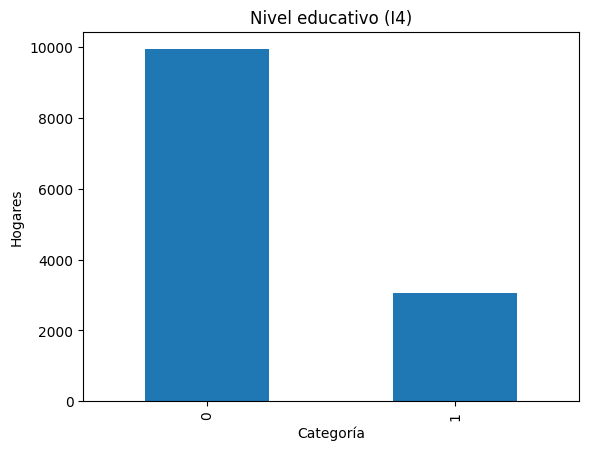

In [15]:
df['I4'].value_counts().plot.bar()
plt.title('Nivel educativo (I4)')
plt.xlabel('Categoría')
plt.ylabel('Hogares')
plt.show()

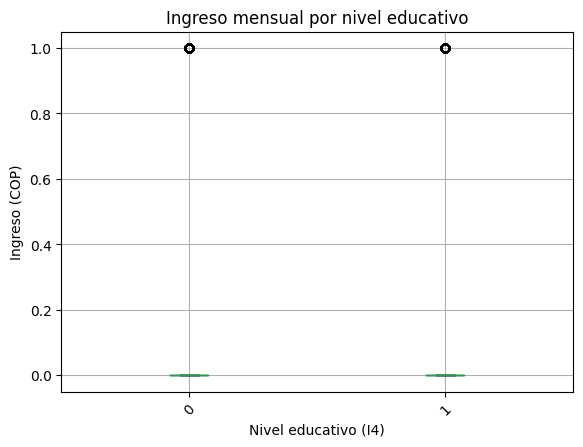

In [16]:
df.boxplot(column='I10', by='I4', rot=45)
plt.title('Ingreso mensual por nivel educativo')
plt.suptitle('')
plt.xlabel('Nivel educativo (I4)')
plt.ylabel('Ingreso (COP)')
plt.show()

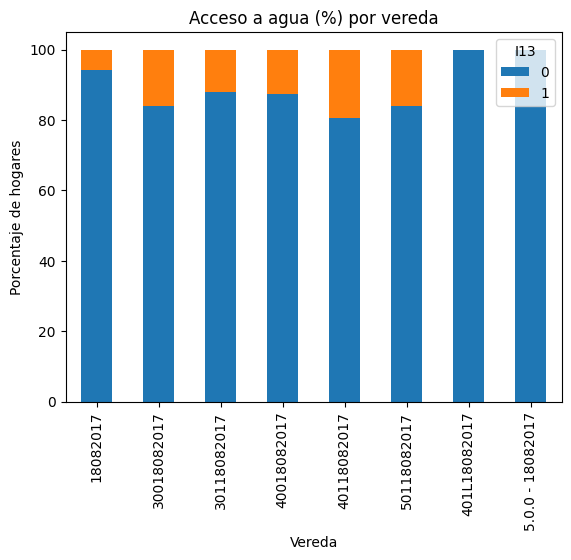

In [17]:
ct = pd.crosstab(df['ver_estructura'], df['I13'], normalize='index').mul(100).round(1)
ct.plot.bar(stacked=True)
plt.title('Acceso a agua (%) por vereda')
plt.xlabel('Vereda')
plt.ylabel('Porcentaje de hogares')
plt.legend(title='I13')
plt.show()

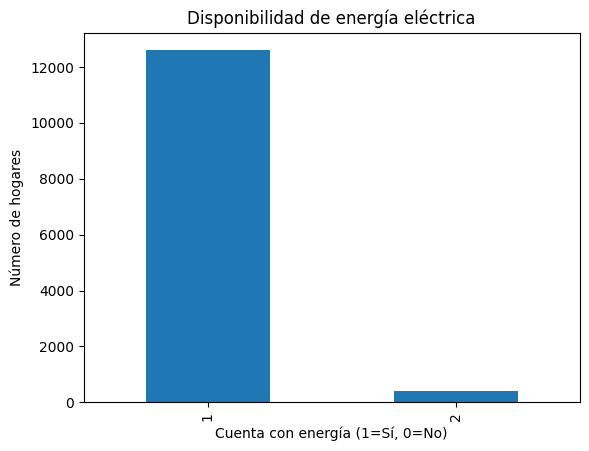

In [20]:
# Gráfica: Disponibilidad de energía eléctrica
plt.figure()
df['ind_tiene_energia'].value_counts().plot(kind='bar')
plt.title('Disponibilidad de energía eléctrica')
plt.xlabel('Cuenta con energía (1=Sí, 0=No)')
plt.ylabel('Número de hogares')
plt.show()

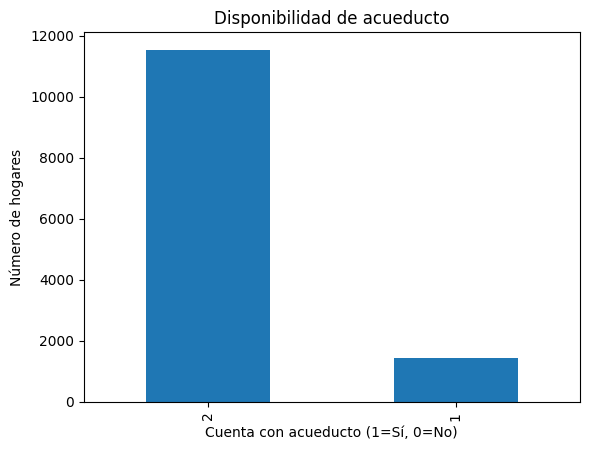

In [21]:
# Disponibilidad de acueducto
plt.figure()
df['ind_tiene_acueducto'].value_counts().plot(kind='bar')
plt.title('Disponibilidad de acueducto')
plt.xlabel('Cuenta con acueducto (1=Sí, 0=No)')
plt.ylabel('Número de hogares')
plt.show()

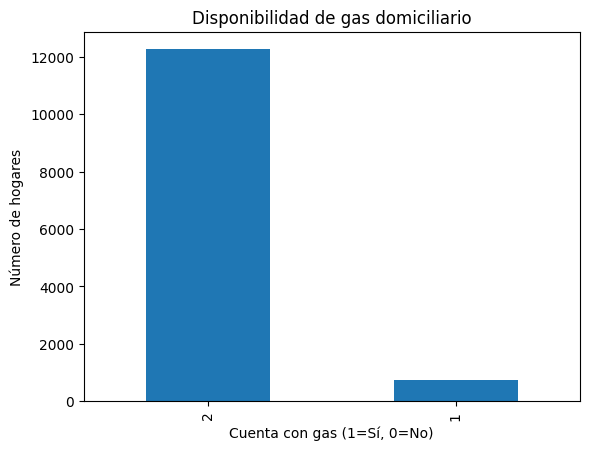

In [22]:
#  Disponibilidad de gas domiciliario
plt.figure()
df['ind_tiene_gas'].value_counts().plot(kind='bar')
plt.title('Disponibilidad de gas domiciliario')
plt.xlabel('Cuenta con gas (1=Sí, 0=No)')
plt.ylabel('Número de hogares')
plt.show()

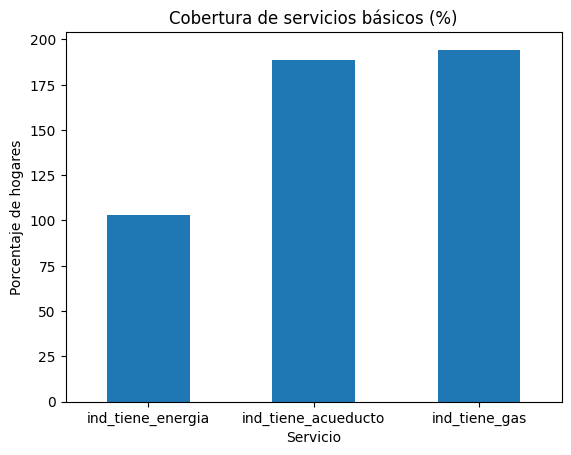

In [23]:
#  Cobertura de servicios básicos (% de hogares)
coverage = df[['ind_tiene_energia', 'ind_tiene_acueducto', 'ind_tiene_gas']].mean() * 100
plt.figure()
coverage.plot(kind='bar')
plt.title('Cobertura de servicios básicos (%)')
plt.xlabel('Servicio')
plt.ylabel('Porcentaje de hogares')
plt.xticks(rotation=0)
plt.show()

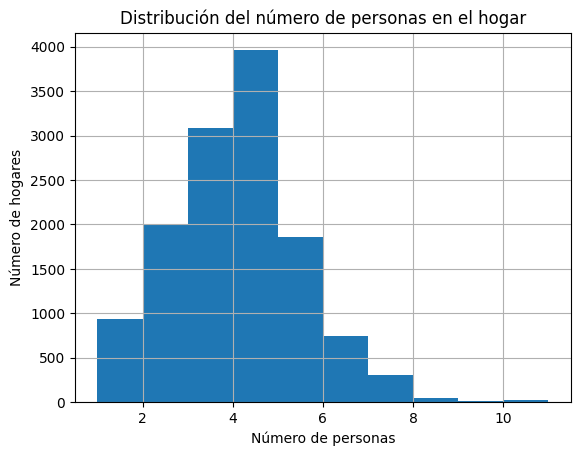

In [24]:
#  Distribución del número de personas en el hogar
plt.figure()
df['persug'].hist(bins=range(1, int(df['persug'].max()) + 2))
plt.title('Distribución del número de personas en el hogar')
plt.xlabel('Número de personas')
plt.ylabel('Número de hogares')
plt.show()

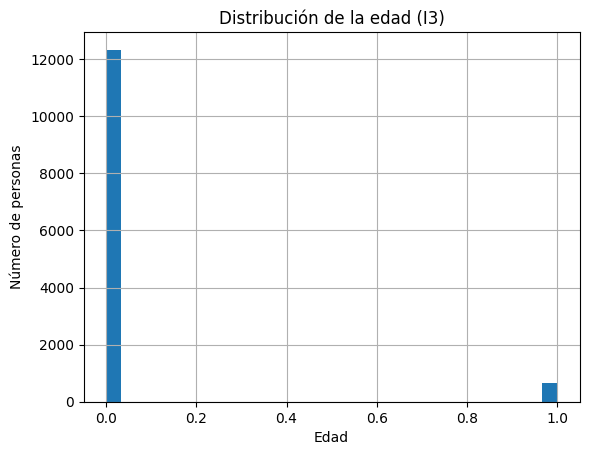

In [25]:
# 1. Distribución de edad (I3)
plt.figure()
df['I3'].dropna().hist(bins=30)
plt.title('Distribución de la edad (I3)')
plt.xlabel('Edad')
plt.ylabel('Número de personas')
plt.show()

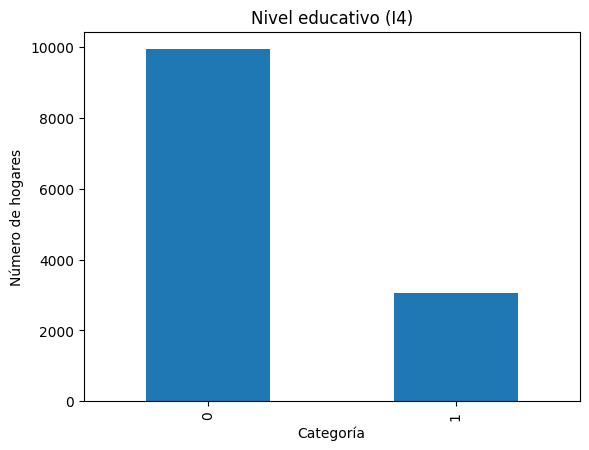

In [26]:
# 2. Nivel educativo (I4)
plt.figure()
df['I4'].value_counts().plot.bar()
plt.title('Nivel educativo (I4)')
plt.xlabel('Categoría')
plt.ylabel('Número de hogares')
plt.show()

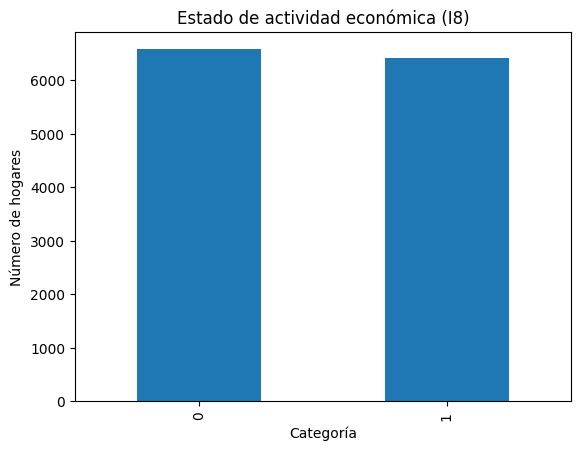

In [27]:
# 3. Estado de actividad económica (I8)
plt.figure()
df['I8'].value_counts().plot.bar()
plt.title('Estado de actividad económica (I8)')
plt.xlabel('Categoría')
plt.ylabel('Número de hogares')
plt.show()

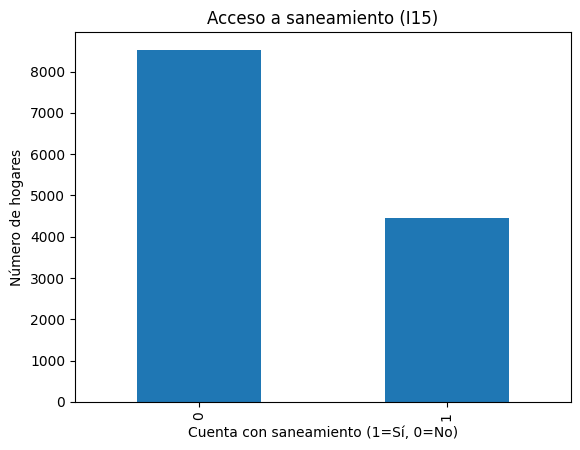

In [28]:
# 4. Acceso a saneamiento (I15)
plt.figure()
df['I15'].value_counts().plot.bar()
plt.title('Acceso a saneamiento (I15)')
plt.xlabel('Cuenta con saneamiento (1=Sí, 0=No)')
plt.ylabel('Número de hogares')
plt.show()

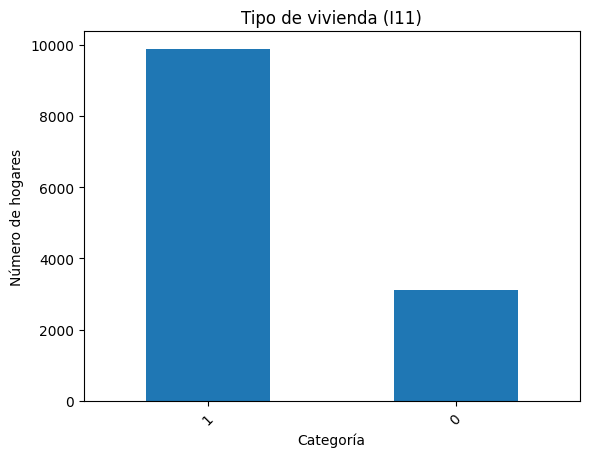

In [29]:
# 5. Tipo de vivienda (I11)
plt.figure()
df['I11'].value_counts().plot.bar()
plt.title('Tipo de vivienda (I11)')
plt.xlabel('Categoría')
plt.ylabel('Número de hogares')
plt.xticks(rotation=45)
plt.show()

<Figure size 640x480 with 0 Axes>

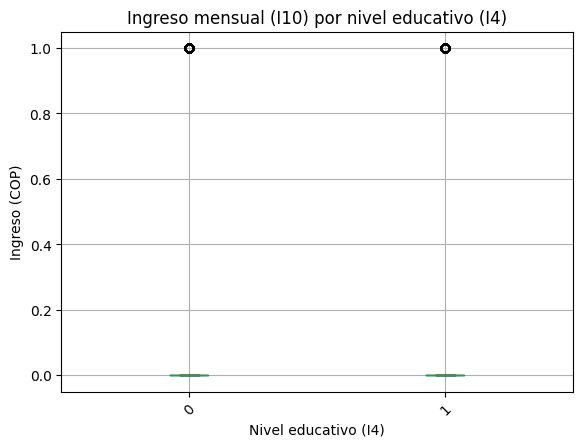

In [30]:
# 6. Ingreso mensual vs nivel educativo (I10 por I4)
plt.figure()
df.boxplot(column='I10', by='I4', rot=45)
plt.title('Ingreso mensual (I10) por nivel educativo (I4)')
plt.suptitle('')
plt.xlabel('Nivel educativo (I4)')
plt.ylabel('Ingreso (COP)')
plt.show()